# Target : Feature Engineering
#### Select necessary features such as <code> Categorical, Numerical, Boolean variables </code> and drop redundant variables for further Machine Learning Application 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("E:\DS_ML_Projects_VS\Applied_DS_Captsone\Feature Engineering\Wrangled_data.csv")
df.drop(['Outcome'], axis=1, inplace=True)
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Landing_Outcome,Landing_Region
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0,None
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0,None
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0,None
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0,Ocean
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0,None


In [3]:
df.dtypes

FlightNumber                int64
Date               datetime64[ns]
BoosterVersion             object
PayloadMass               float64
Orbit                      object
LaunchSite                 object
Flights                     int64
GridFins                     bool
Reused                       bool
Legs                         bool
LandingPad                 object
Block                       int64
ReusedCount                 int64
Serial                     object
Longitude                 float64
Latitude                  float64
Landing_Outcome             int64
Landing_Region             object
dtype: object

#### Let's drop the redundant variables at first

In [4]:
df.drop(['Date','BoosterVersion','Flights','Serial','Longitude','Latitude'], axis=1, inplace=True)

Let's change the Landing Pads specific name instead of a serial number!

In [5]:
df.isnull().sum()

FlightNumber        0
PayloadMass         0
Orbit               0
LaunchSite          0
GridFins            0
Reused              0
Legs                0
LandingPad         26
Block               0
ReusedCount         0
Landing_Outcome     0
Landing_Region      0
dtype: int64

In [6]:
df['LandingPad'].fillna('None', inplace=True)

In [7]:
df['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    35
None                        26
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64

In [8]:
df["LandingPad"].unique()


array(['None', '5e9e3032383ecb761634e7cb', '5e9e3032383ecb6bb234e7ca',
       '5e9e3032383ecb267a34e7c7', '5e9e3033383ecbb9e534e7cc',
       '5e9e3032383ecb554034e7c9'], dtype=object)

In [9]:
LandingPadno = 0
for padid in df["LandingPad"].unique():
    if padid == "None":
        df["LandingPad"].replace("None", "NoLandingPad", inplace=True)
    else:
        df["LandingPad"].replace(padid, f"LandingPad{LandingPadno}", inplace=True)
        
    LandingPadno += 1
del LandingPadno

In [10]:
df['LandingPad'].value_counts()

LandingPad2     35
NoLandingPad    26
LandingPad3     13
LandingPad4     12
LandingPad1      2
LandingPad5      2
Name: LandingPad, dtype: int64

In [11]:
df.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Landing_Outcome,Landing_Region
0,1,6123.547647,LEO,CCSFS SLC 40,False,False,False,NoLandingPad,1,0,0,None
1,2,525.000000,LEO,CCSFS SLC 40,False,False,False,NoLandingPad,1,0,0,None
2,3,677.000000,ISS,CCSFS SLC 40,False,False,False,NoLandingPad,1,0,0,None
3,4,500.000000,PO,VAFB SLC 4E,False,False,False,NoLandingPad,1,0,0,Ocean
4,5,3170.000000,GTO,CCSFS SLC 40,False,False,False,NoLandingPad,1,0,0,None


#### To determine the correlation between the categorical variables We will be using <code> Chi-squared Contingency Test </code>

**Why Chi-squared Test?**
Because it's a classification problem with multiple categorical features and it is appropriate to use the Chi Square method for feature selection.

*Procedure:*
   Use **plot_chisquare_hmap** function to produce a heatmap of p-values obtain by applying Chi Square on categorical features and target. 

*Results:*
   A p-value lower than 0.05 >>>> there exists a relationship between two variables
   Otherwise, the two variables are considered independent.

One of the condition to use Chi Squared is that the expected frequencies should be at least 5 for the majority (80%) of the cells. When this condition is not satisfied, plot_chisquare_heatmap sets the p-value to 2 thus indicating that the two variables could be used

In [12]:
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import seaborn as sns

In [13]:
#c_tab = pd.crosstab(df['LaunchSite'],df['LandingPad'])  # Build contigency table
#c ,p, dof, expected = chi2_contingency(c_tab) 
#c, p, dof
#expected, #expected.size

In [14]:
def plot_chisquare_hmap(df, column_names, target, figsize=(12,6)):
    column_names.append(target)
    n_cols = len(column_names)
    chisquare_df = pd.DataFrame(np.zeros((n_cols,n_cols)), columns = column_names, index =column_names)
    i=0
    j=0
    for icol in column_names:
        for jcol in column_names:
            contingency_tab = pd.crosstab(df[icol],df[jcol])  # Build contigency table
            c ,p, dof, expected = chi2_contingency(contingency_tab) # Get stats along with p-value
            chisquare_df.iloc[i,j] = round(p, 5)  # Automatically round down very small p values to zero
            #A condition to use Chi Square is that the expected frequencies should be atleast 5 for the majority (80%) of the cells 
            expected_percentage =  100 * expected[expected >= 5].size / expected.size # Get % of cells with frequency of at least 5
            if icol == jcol:
                chisquare_df.iloc[i,j] = 0.0
            # If the expected frequency is less than 5 for the (20%), we ignore the p-value between the two variables.
            # We set the p-value to 5 in order to better visualize this case
            # We will then keep both variables.
            if expected_percentage < 20:
                chisquare_df.iloc[i,j] = 5
            else:
                chisquare_df.iloc[i,j] = round(p, 5)
            j = j+1
        i = i+1
        j=0

    _, ax = plt.subplots(figsize=figsize)
    sns.heatmap(chisquare_df, annot=True, ax=ax)
    #ax.set_xticklabels(labels=cols, rotation=90)
    #ax.set_yticklabels(labels=cols, rotation=0)
    ax.set_title("Chi Squared p-values", fontsize=14)
    plt.show()

In [15]:
def plot_corr_hmap(df, column_names, target, figsize=(14,6)):
    column_names.append(target)
    n_cols = len(column_names)
    corr_matrix = pd.DataFrame(np.zeros((n_cols, n_cols)), columns=column_names, index=column_names)
    pvalue_matrix = pd.DataFrame(np.zeros((n_cols, n_cols)), columns=column_names, index=column_names)
    i = 0
    j = 0
    for icol in column_names:
        for jcol in column_names:
            corr, p = pearsonr(df[icol], df[jcol])
            corr_matrix.iloc[i,j] = round(corr, 5)
            pvalue_matrix.iloc[i,j] = round(p, 5) # Round down very low p-values to 0
            j = j + 1
        i = i + 1
        j = 0

    _, ax = plt.subplots(figsize=figsize, ncols=2, nrows=1)

    # Plot correlation matrix
    sns.heatmap(corr_matrix, annot=True, ax=ax[0])
    ax[0].set_title("Correlation Matrix", fontsize=14)
    ax[0].set_xticklabels(column_names, rotation=45)
    ax[0].set_yticklabels(column_names, rotation=45)
    
    # Plot p-values matrix
    sns.heatmap(pvalue_matrix, annot=True, ax=ax[1])
    ax[1].set_title("p-values Matrix", fontsize=14)
    ax[1].set_xticklabels(column_names, rotation=45)
    ax[1].set_yticklabels(column_names, rotation=45)
    plt.show()

### Now, Lets visualize the test results through heat map

**Chi-Sqaured Test Heatmap with p values**

Categorical Columns:
1. Orbit 2. LaunchSite 3. LandingPad 4. LandingRegion

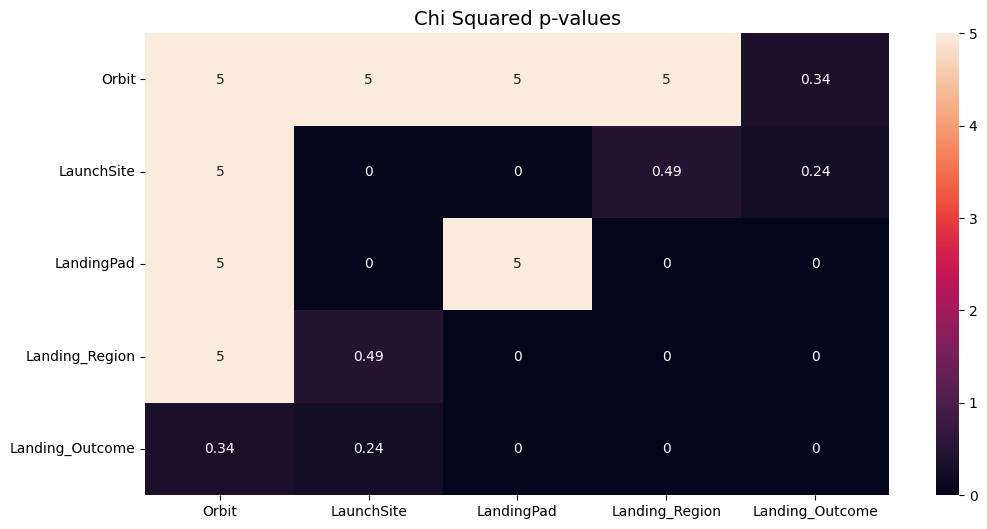

In [16]:
categories = ["Orbit", "LaunchSite", "LandingPad", "Landing_Region"]

plot_chisquare_hmap(df, column_names = categories, target = 'Landing_Outcome')

Orbit and LaunchSite do not have statistically significant correlation with the target variable (0.34 , 0.24). These two variables are also independent from each other.

Landing Pad and Landing_Region have significant correlation with the target Landing_Outcome and also with each other. 
As Landing_Region has stronger relation with the target, we should keep this as a important feature.

LaunchSite has correlation with Landing Pad but independent from Landing_Region. So, we can drop LaunchSite and keep LandingPad 

Orbit is independent from every other variable.

In [17]:
pd.crosstab(df["LandingPad"], df["Landing_Region"])

Landing_Region,ASDS,None,Ocean,RTLS
LandingPad,,,,
LandingPad1,2,0,0,0
LandingPad2,35,0,0,0
LandingPad3,0,0,0,13
LandingPad4,12,0,0,0
LandingPad5,0,0,0,2
NoLandingPad,0,19,7,0


The contingency table above showcases that each LandingPad is asscociated with atleast one LandingRegion. Only when there is no Landing Pad, the rocket landed on either the Ocean or crashed i.e., landed nowhere.

This means that we can easily deduct LandingPad as a fetaure as we already saw that it has a strong correlation with Landing Region.

### Pearson correlation heatmap with p values
**Boolean variables:**
1. GridFins
2. Legs
3. Reused

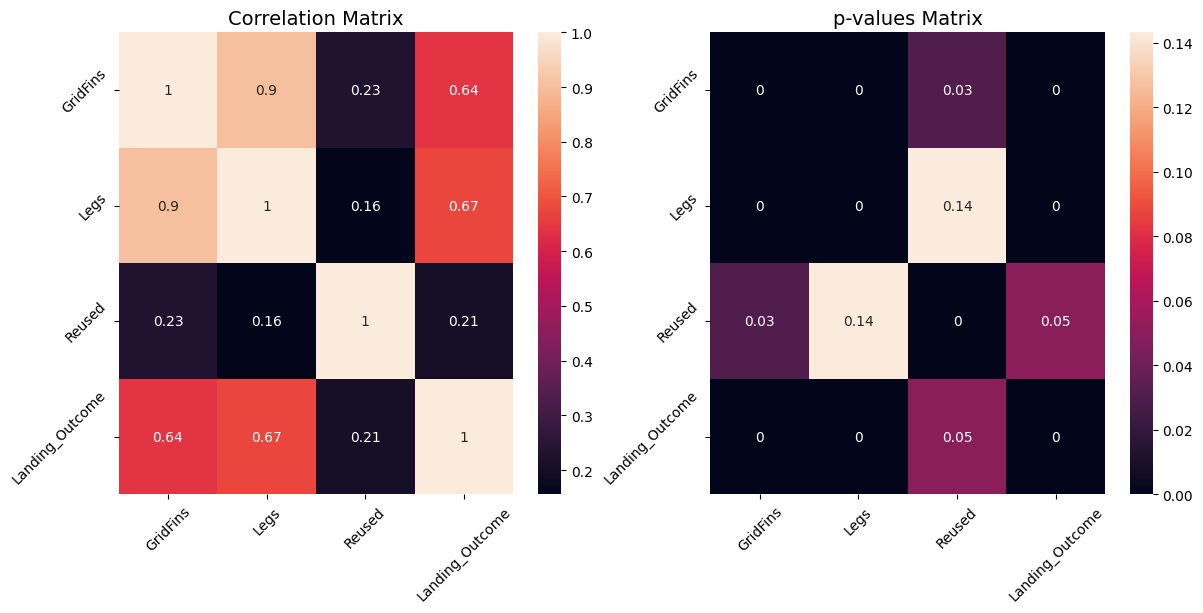

In [18]:
bool_col = ["GridFins", "Legs", "Reused"]
plot_corr_hmap(df, column_names= bool_col, target = 'Landing_Outcome')

GridFins, Legs and Reused have statistically significant relationship with the target variable-Landing_Outcome. GridFins and Legs are also highly correlated (90%) to each other. So, to avoid overfitting, we can drop one variable.
As Legs show stronger correlation with Landing_Outcome, we can drop the GridFins and take Legs instead. On the other hand, the correlation of Reused to Landing_Outcome is very poor, so we drop that too. 

If we are dropping the variable Resued, then we also have to neglect the Reused Count. Because, the number of times a rocket has been reused only matters when we consider if the rocket is being resued or not. And if the rocket lands succesfully, only then we can reuse the rocket on multiple occasions. So, we can drop both Reused and ReusedCount variables. 

**Numeric Variables**
1. PayloadMass
2. Flights
3. Block

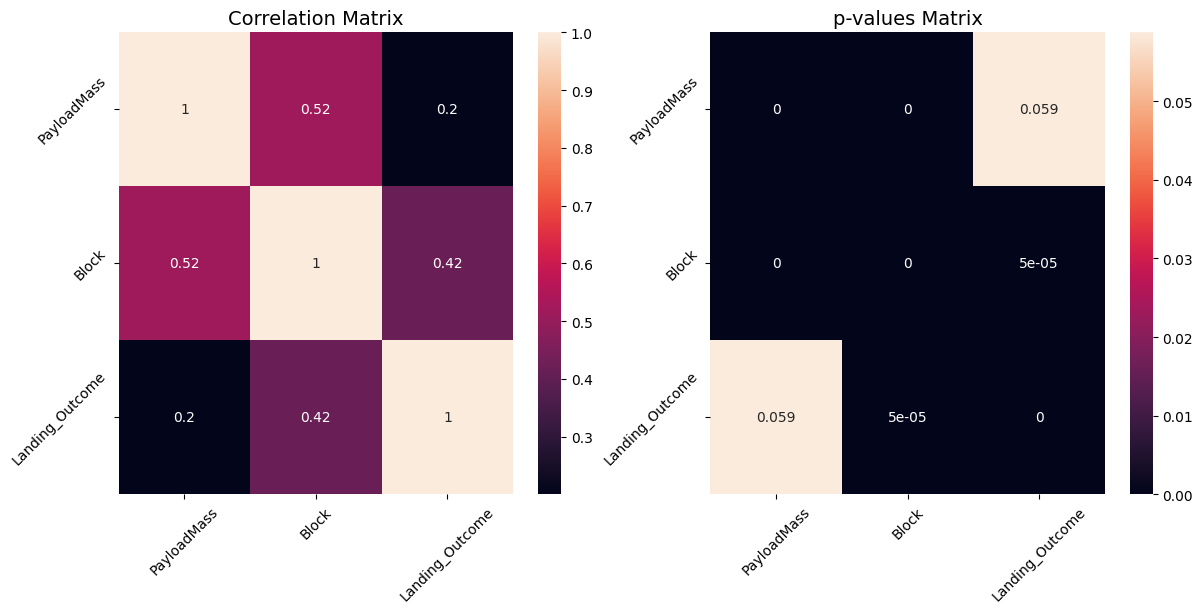

In [19]:
numerical_col = ["PayloadMass", "Block"]
plot_corr_hmap(df, column_names= numerical_col, target = 'Landing_Outcome')

Block has statistically significant correlation (42%) with Landing_Outcome whereas PayloadMass seems to have no correlation with it.
So, we can drop PayloadMass as a feature.

### Final feature set

In [20]:
feature_set = df.drop(['FlightNumber','PayloadMass','Reused','ReusedCount','GridFins','LandingPad','LaunchSite'], axis=1)
feature_set.head()

,Orbit,Legs,Block,Landing_Outcome,Landing_Region
0,LEO,False,1,0,None
1,LEO,False,1,0,None
2,ISS,False,1,0,None
3,PO,False,1,0,Ocean
4,GTO,False,1,0,None


In [21]:
feature_set.dtypes, feature_set.columns

(Orbit              object
 Legs                 bool
 Block               int64
 Landing_Outcome     int64
 Landing_Region     object
 dtype: object,
 Index(['Orbit', 'Legs', 'Block', 'Landing_Outcome', 'Landing_Region'], dtype='object'))

In [22]:
dummy_columns = ['Orbit','Landing_Region']

In [23]:
def dummies(feature_set, column_names):
    for icol in column_names:
        dummy = pd.get_dummies(feature_set[icol])
        feature_set = feature_set.join(dummy)
    return feature_set

In [24]:
dummy_columns = ['Orbit','Landing_Region']
feature_set = dummies(feature_set, column_names = dummy_columns)
feature_set.head()

,Orbit,Legs,Block,Landing_Outcome,Landing_Region,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,VLEO,ASDS,None,Ocean,RTLS
0,LEO,False,1,0,None,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,LEO,False,1,0,None,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,ISS,False,1,0,None,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,PO,False,1,0,Ocean,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,GTO,False,1,0,None,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
feature_set.drop(['Orbit','Landing_Region'], axis = 1, inplace = True)

In [26]:
feature_set.head()

,Legs,Block,Landing_Outcome,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,VLEO,ASDS,None,Ocean,RTLS
0,False,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,False,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,False,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,False,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,False,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
feature_set.to_csv('Feature_set.csv', index=False)